# Imbalanced sample null simulation

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from ddn3 import simulation, tools
from ddn3 import ddn as ddn_new
from ddn2 import ddn as ddn_old
from ddn3_extra import simulation_r

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
def scan_ddn(
    dat1, dat2, lambda1_rg, lambda2, use_new=True,
):
    t1_lst = []
    t2_lst = []
    for i, lamb in enumerate(lambda1_rg):
        print(lamb)
        if use_new:
            out_ddn = ddn_new.ddn(
                dat1, dat2, lambda1=lamb, lambda2=lambda2, threshold=1e-5, mthd='resi'
            )
        else:
            out_ddn = ddn_old.ddn(
                dat1, dat2, lambda1=lamb, lambda2=lambda2, threshold=1e-5, mthd='resi'
            )  
        t1_lst.append(np.copy(out_ddn[0]))
        t2_lst.append(np.copy(out_ddn[1]))
    return t1_lst, t2_lst


def cnt_edges(t1_lst, t2_lst):
    n_l1 = len(t1_lst)
    cnt_arr = np.zeros((n_l1, 2))
    for n in range(n_l1):
        t1 = t1_lst[n]
        t2 = t2_lst[n]
        m1 = tools.get_net_topo_from_mat(t1)
        m2 = tools.get_net_topo_from_mat(t2)
        cnt_arr[n, 0] = np.sum(m1)/2
        cnt_arr[n, 1] = np.sum(m2)/2
    return cnt_arr


In [119]:
omega, _, _ = simulation_r.huge_omega(
    n_node=50, ratio_diff=0.25, graph_type='scale-free',
)

g1_cov, _, comm_gt, _ = simulation.prep_sim_from_two_omega(
    omega, omega
)
print(np.sum(comm_gt/2))

n1 = 200
n2 = 250
dat1, dat2 = simulation.gen_sample_two_conditions(g1_cov, g1_cov, n1, n2)

49.0


In [120]:
print(dat1.shape, dat2.shape)

(200, 50) (250, 50)


Run DDN2 and DDN3

In [121]:
l1_lst = np.arange(0.02, 1.0, 0.02)
l2 = 0.0

t1_lst_old, t2_lst_old = scan_ddn(dat1, dat2, l1_lst, l2, use_new=False)
t1_lst_new, t2_lst_new = scan_ddn(dat1, dat2, l1_lst, l2, use_new=True)
cnt_old = cnt_edges(t1_lst_old, t2_lst_old)
cnt_new = cnt_edges(t1_lst_new, t2_lst_new)


0.02
0.04
0.06
0.08
0.1
0.12000000000000001
0.13999999999999999
0.16
0.18
0.19999999999999998
0.22
0.24
0.26
0.28
0.30000000000000004
0.32
0.34
0.36000000000000004
0.38
0.4
0.42000000000000004
0.44
0.46
0.48000000000000004
0.5
0.52
0.54
0.56
0.5800000000000001
0.6
0.62
0.64
0.66
0.68
0.7000000000000001
0.7200000000000001
0.74
0.76
0.78
0.8
0.8200000000000001
0.8400000000000001
0.86
0.88
0.9
0.92
0.9400000000000001
0.9600000000000001
0.98
0.02
0.04
0.06
0.08
0.1
0.12000000000000001
0.13999999999999999
0.16
0.18
0.19999999999999998
0.22
0.24
0.26
0.28
0.30000000000000004
0.32
0.34
0.36000000000000004
0.38
0.4
0.42000000000000004
0.44
0.46
0.48000000000000004
0.5
0.52
0.54
0.56
0.5800000000000001
0.6
0.62
0.64
0.66
0.68
0.7000000000000001
0.7200000000000001
0.74
0.76
0.78
0.8
0.8200000000000001
0.8400000000000001
0.86
0.88
0.9
0.92
0.9400000000000001
0.9600000000000001
0.98


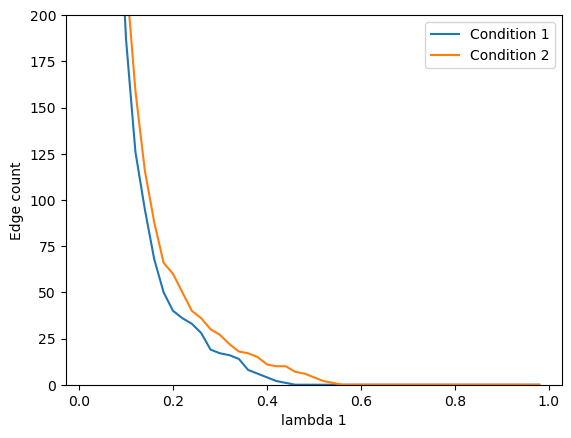

In [122]:
plt.plot(l1_lst, cnt_old)
plt.ylim([0, 200])
plt.xlabel('lambda 1')
plt.ylabel('Edge count')
plt.legend(['Condition 1', 'Condition 2'])

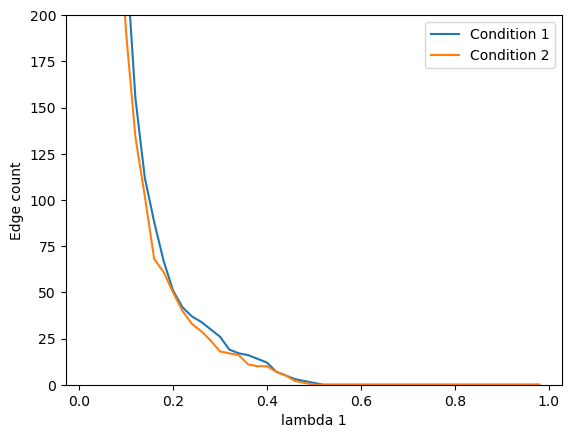

In [123]:
plt.plot(l1_lst, cnt_new)
plt.ylim([0, 200])
plt.xlabel('lambda 1')
plt.ylabel('Edge count')
plt.legend(['Condition 1', 'Condition 2'])